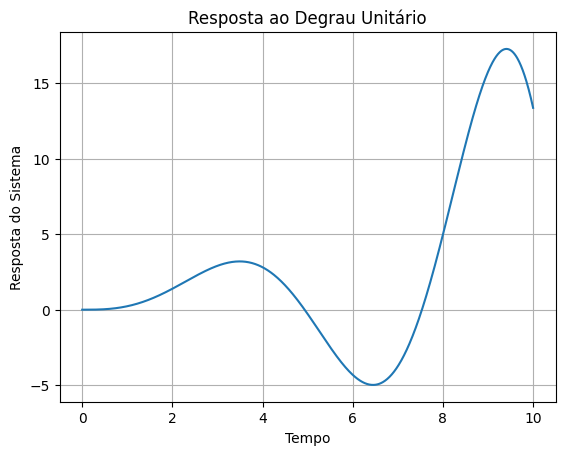

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função de transferência em malha aberta
numerator = [1]
denominator = [3, 2, 1, 0]
sys_open_loop = ctrl.TransferFunction(numerator, denominator)

# Projeto do controlador proporcional
Kp = 5.0
controller_transfer_function = ctrl.TransferFunction([Kp], [1])

# Criando o sistema em malha fechada
sys_closed_loop = ctrl.feedback(sys_open_loop * controller_transfer_function)

# Definindo o tempo da simulação
time = np.linspace(0, 10, 1000)

# Resposta ao degrau unitário
time, response = ctrl.step_response(sys_closed_loop, time)

# Plotando os resultados
plt.plot(time, response)
plt.xlabel('Tempo')
plt.ylabel('Resposta do Sistema')
plt.title('Resposta ao Degrau Unitário')
plt.grid(True)
plt.show()


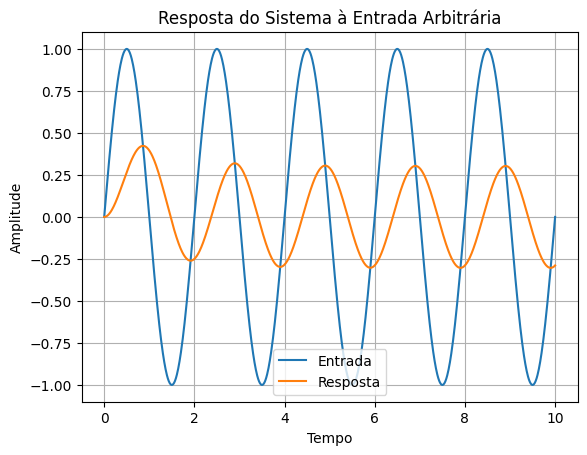

In [2]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Definindo a função de transferência em malha aberta
numerator = [1]
denominator = [1, 0]
sys_open_loop = ctrl.TransferFunction(numerator, denominator)

# Projeto do controlador proporcional
Kp = 1.0
controller_transfer_function = ctrl.TransferFunction([Kp], [1])

# Criando o sistema em malha fechada
sys_closed_loop = ctrl.feedback(sys_open_loop * controller_transfer_function)

# Definindo o tempo da simulação
time = np.linspace(0, 10, 1000)

# Criando um sinal de entrada arbitrário (por exemplo, uma onda senoidal)
input_signal = np.sin(2 * np.pi * 0.5 * time)

# Simulando a resposta do sistema à entrada arbitrária
time, response = ctrl.forced_response(sys_closed_loop, time, input_signal)

# Plotando os resultados
plt.plot(time, input_signal, label='Entrada')
plt.plot(time, response, label='Resposta')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta do Sistema à Entrada Arbitrária')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
type(sys_closed_loop)

control.xferfcn.TransferFunction

In [4]:
from model.motor import Motor, MotorDataModel
import json

In [5]:
with open("data/data_plant.json", "r") as inp:
    data = json.load(inp)

In [6]:
data

{'engines': [{'resistence': 100,
   'inductance': 1.0,
   'torque': 5,
   'inertia_moment': 18,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 10,
   'inductance': 1.0,
   'torque': 50,
   'inertia_moment': 1.8,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 1,
   'inductance': 1.0,
   'torque': 75,
   'inertia_moment': 0.18,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 0.1,
   'inductance': 1.0,
   'torque': 100,
   'inertia_moment': 0.018,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 4.5,
   'inductance': 1.0,
   'torque': 5,
   'inertia_moment': 18,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 45,
   'inductance': 1.0,
   'torque': 50,
   'inertia_moment': 1.8,
   'viscous_friction': 4.5,
   'electrical_constant': 7},
  {'resistence': 2.2,
   'inductance': 1.0,
   'torque': 75,
   'inertia_moment': 0.18,
   'viscous_friction': 4.5,
   'ele

In [7]:
data_model = MotorDataModel(**data['engines'][0])
data_model

MotorDataModel(resistence=100, inductance=1.0, torque=5, inertia_moment=18, viscous_friction=4.5, electrical_constant=7)

In [8]:
motor = Motor(data_model)

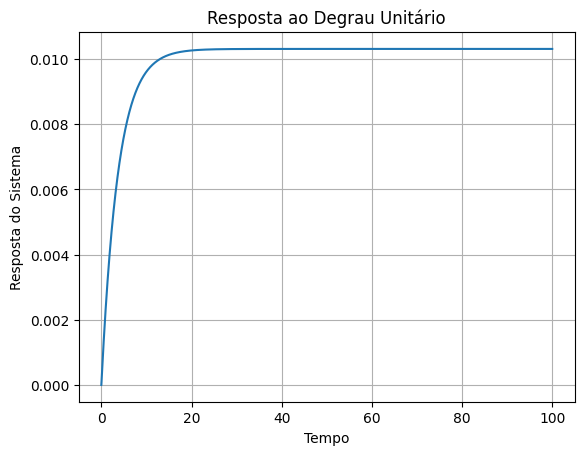

In [9]:
motor.plot_step_response(horizon=100)

In [35]:
motor.closed_loop()

TransferFunction(array([3.71900826e-07, 9.11157025e-04, 2.04545455e-01]), array([6.69421488e-11, 3.28016529e-07, 4.78059917e-04, 1.86787190e-01,
       2.16818182e+01]))

In [32]:
motor.open_loop()

TransferFunction(array([0.04545455]), array([8.18181818e-06, 2.00454545e-02, 4.50000000e+00]))

In [33]:
motor.armature_circuit()

TransferFunction(array([0.00045455]), array([4.54545455e-04, 1.00000000e+00]))

In [34]:
motor.axis_dynamic()

TransferFunction(array([1]), array([0.018, 4.5  ]))

usar pi a transformada inversa para degrau negativo

usar transformada Z para simulacao

In [12]:
data_models = [MotorDataModel(**model) for model in data['engines']]
motors = [Motor(dm) for dm in data_models]

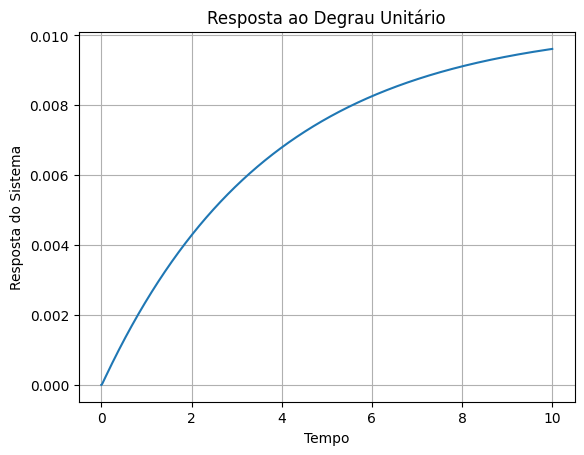

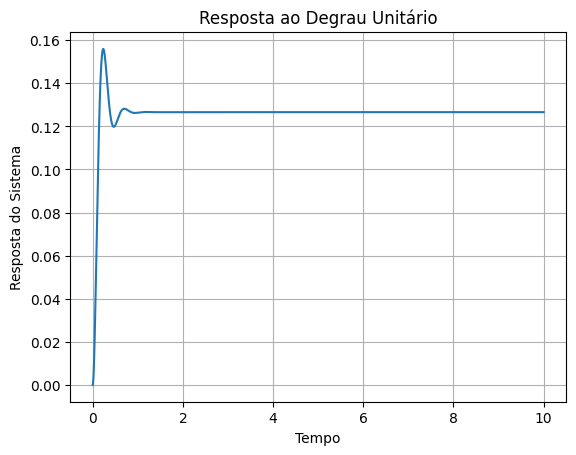

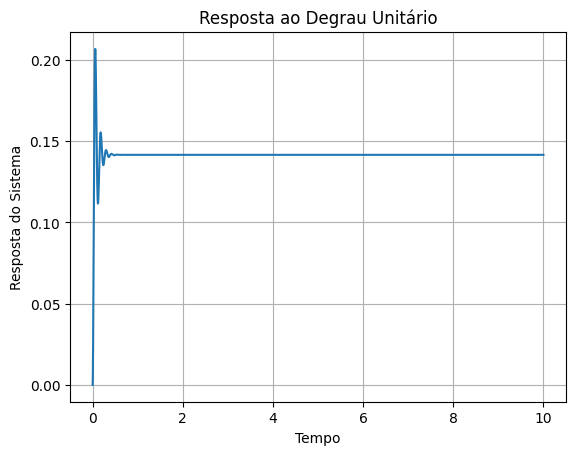

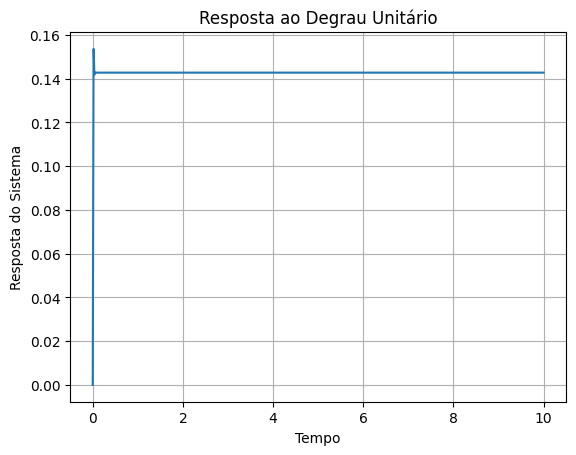

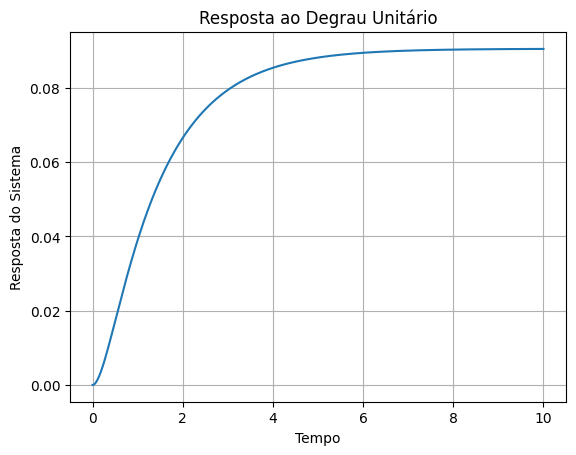

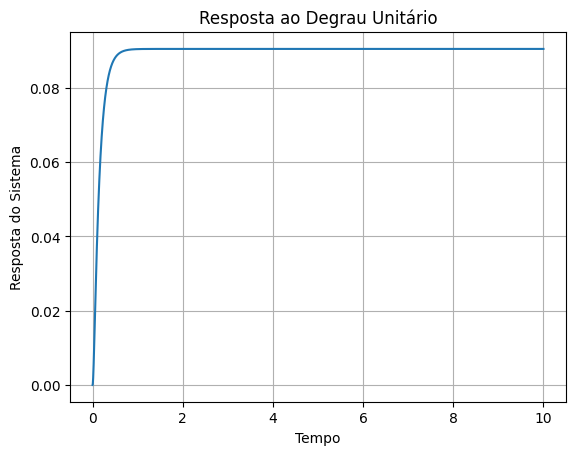

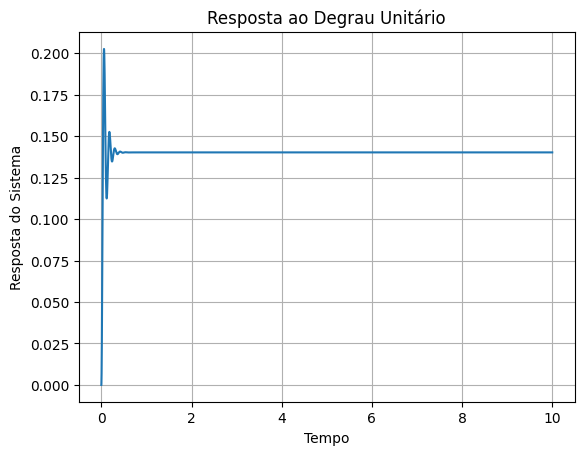

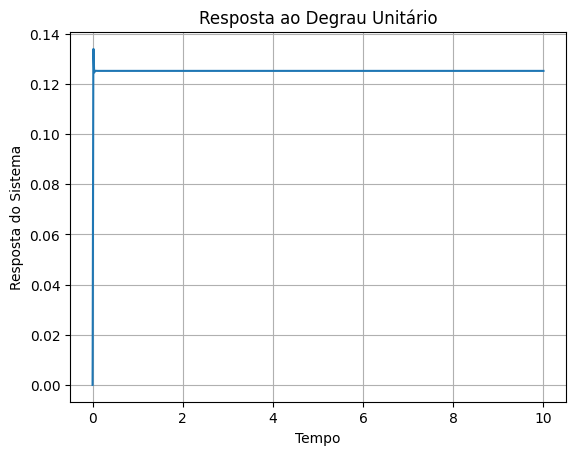

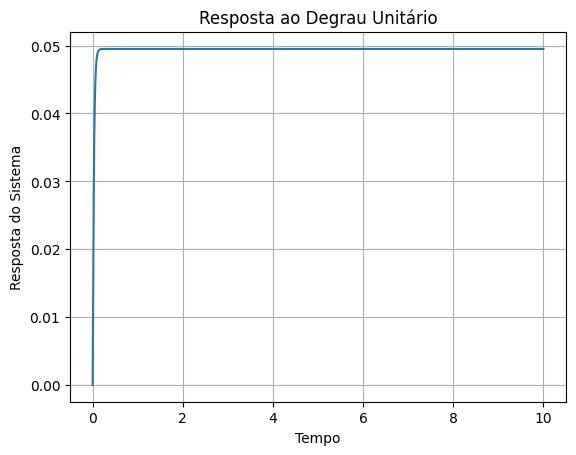

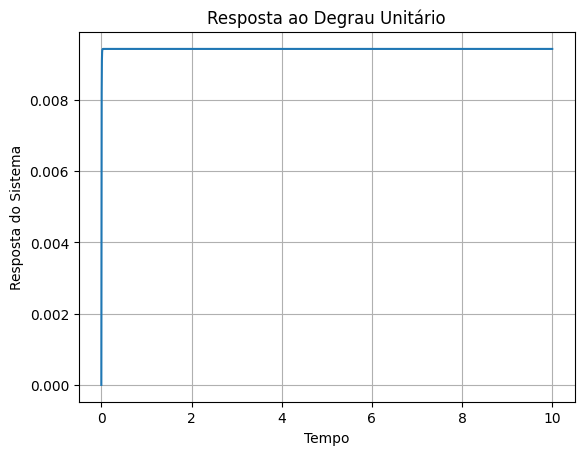

In [13]:
for motor in motors:
    motor.plot_step_response(horizon=10)

In [14]:
with open("data/data_plant.json", "r") as inp:
    data = json.load(inp)

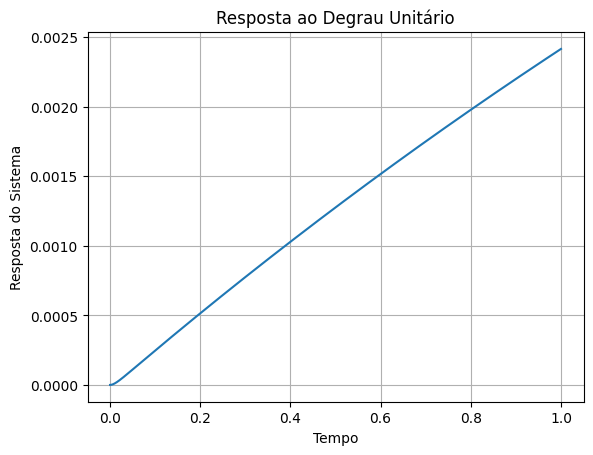

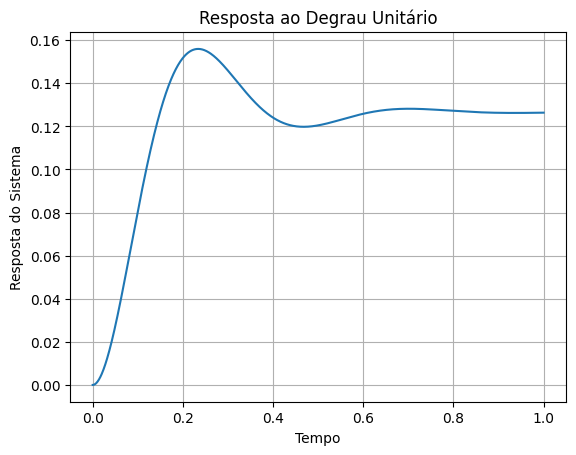

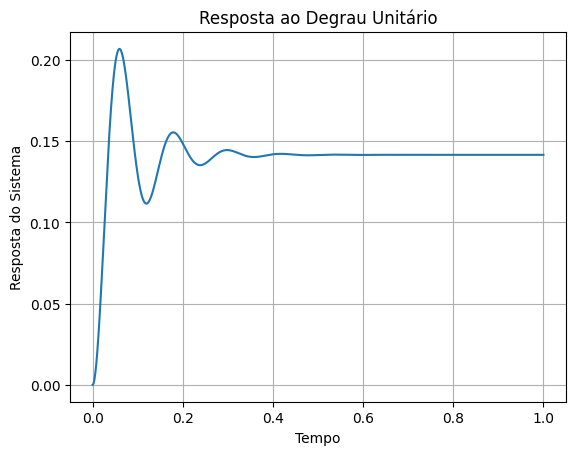

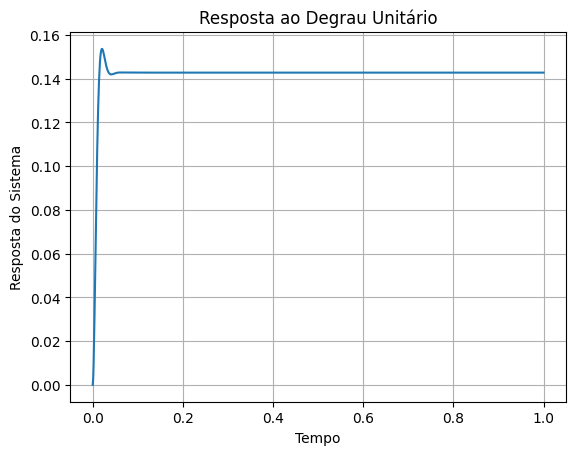

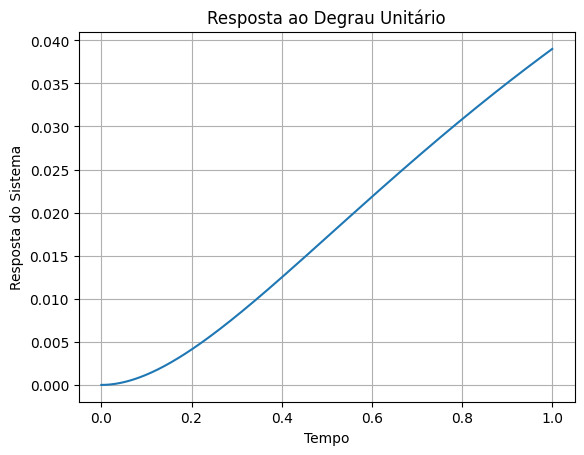

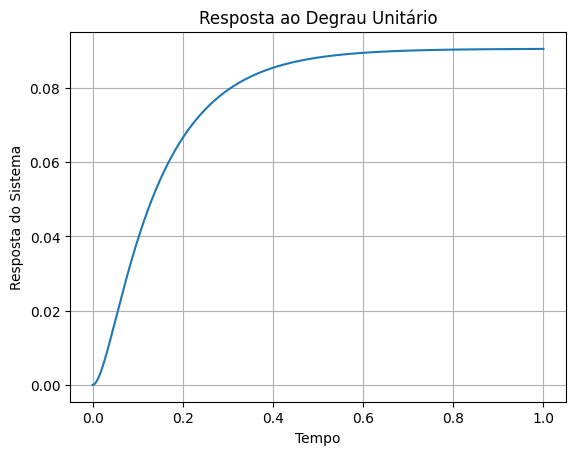

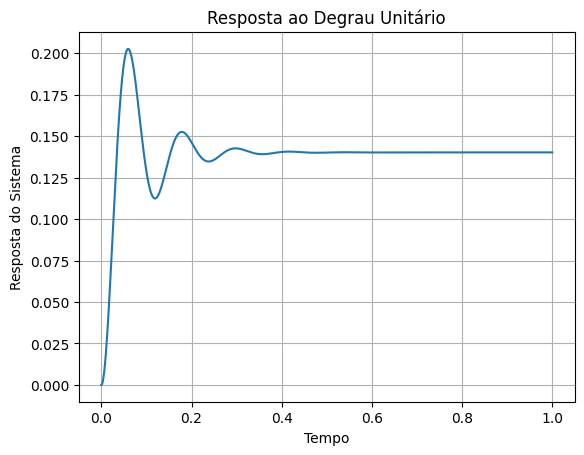

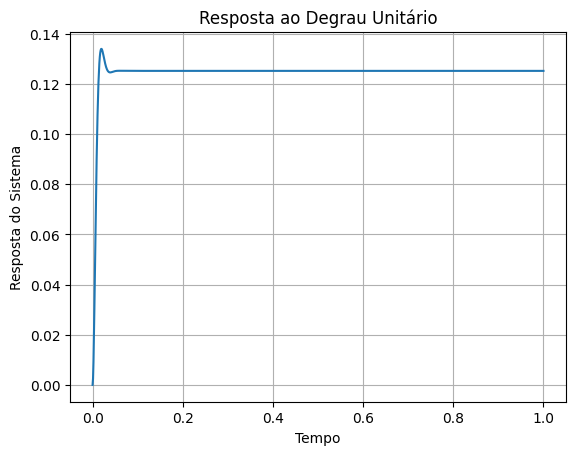

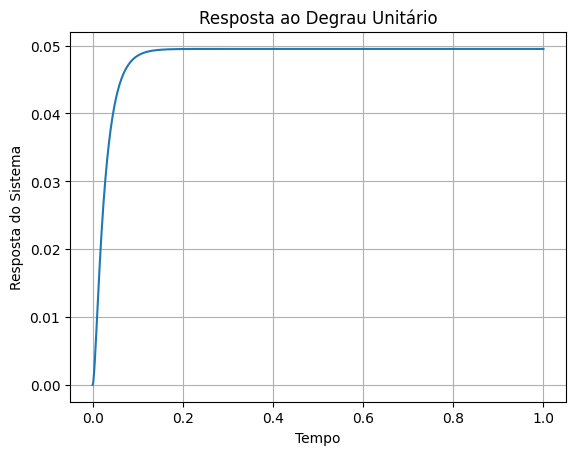

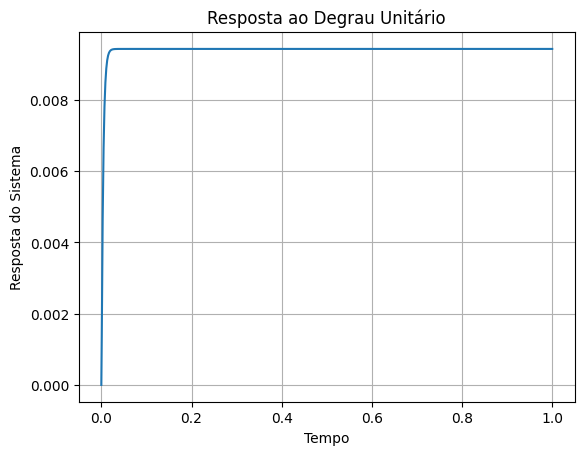

In [15]:
data_models = [MotorDataModel(**model) for model in data['engines']]
motors = [Motor(dm) for dm in data_models]

for motor in motors:
    motor.plot_step_response(horizon=1)

In [16]:
np.heaviside(time-5, 1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
motors[2].closed_loop()

TransferFunction(array([ 13.5, 351. , 337.5]), array([3.240000e-02, 1.684800e+00, 1.180224e+02, 2.499120e+03,
       2.382750e+03]))

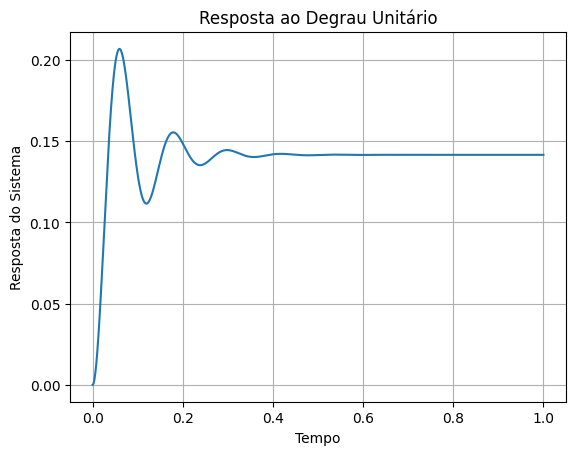

In [18]:
motors[2].plot_step_response(1)

In [19]:
motors[2].closed_loop()

TransferFunction(array([ 13.5, 351. , 337.5]), array([3.240000e-02, 1.684800e+00, 1.180224e+02, 2.499120e+03,
       2.382750e+03]))

In [20]:
import control as ctrl
import numpy as np

def simulate_system(iterations, input_function):
    # Definindo a função de transferência em malha aberta
    # numerator = [75]
    # denominator = [.18, 4.68, 529.5]
    # sys_open_loop = ctrl.TransferFunction(numerator, denominator)

    # # Projeto do controlador proporcional
    Kp = 1.0
    controller_transfer_function = ctrl.TransferFunction([Kp], [1, 0, 0, 0])

    # # Criando o sistema em malha fechada
    # sys_closed_loop = ctrl.feedback(motors[2].open_loop() * controller_transfer_function)
    sys_closed_loop = motors[2].closed_loop()

    # Inicializando vetores de histórico
    input_history = np.zeros(iterations)
    output_history = np.zeros(iterations)
    signal_start = 0
    change = 0

    # Simulação iterativa
    for i in range(iterations):
        # Gerando sinal de entrada para a iteração atual
        G = input_function(i)

        # Simulando a resposta do sistema
            # last_response = 0 if i == 0 else output_history[i-1]
            # last_last_response = 0 if i == 1 else output_history[i-2]
        d = 1e-4
        if G == 0 and not input_history:
            output = 0
        elif G == 1:
            signal_start = i
            time_data = [signal_start, (signal_start+1) * d]
            t, response, = ctrl.step_response(sys_closed_loop, time_data )#, [last_last_response, last_response])
            output = change + response[-1]
            change = 0
        else:
            if output_history[-1] > 0 and change > 0:
                change = output_history[-1]
            time_data = [signal_start, (signal_start+1) * d]
            t, response, = ctrl.step_response(sys_closed_loop, time_data )#, [last_last_response, last_response])
            output = change - response[-1]
            change = -1
            
        # print(f"{time_data}")

        # Armazenando dados no vetor de histórico
        input_history[i] = G
        
        output_history[i] = output

    return input_history, output_history, controller_transfer_function, sys_closed_loop

# Função de exemplo para a entrada (pode ser ajustada conforme necessário)
# def example_input_function(iteration):
#     if iteration >= 3:
#         return 1
#     return 0

def example_input_function(i):
    if 3 < i < 2500:
        return 1

# Número de iterações
iterations = 4000

# Chamando a função de simulação
input_history, output_history, controller_transfer_function, sys_closed_loop = simulate_system(iterations, example_input_function)

# Exemplo de como você pode usar os dados armazenados
# for i in range(iterations):
#     print(f"Iteração {i + 1} - Entrada: {input_history[i]}, Saída: {output_history[i]}")


/home/matheus/.virtualenvs/distributed_systems/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:377: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
/home/matheus/.virtualenvs/distributed_systems/lib/python3.9/site-packages/control/timeresp.py:1051: RuntimeWarning: invalid value encountered in subtract
  Bd0 = expM[:n_states, n_states:n_states + n_inputs] - Bd1
/home/matheus/.virtualenvs/distributed_systems/lib/python3.9/site-packages/control/timeresp.py:1054: RuntimeWarning: invalid value encountered in matmul
  xout[:, i] = (Ad @ xout[:, i-1]
/home/matheus/.virtualenvs/distributed_systems/lib/python3.9/site-packages/scipy/linalg/_matfuncs.py:377: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw


In [21]:
controller_transfer_function

TransferFunction(array([1.]), array([1, 0, 0, 0]))

In [22]:
motors[2].open_loop()

TransferFunction(array([75.]), array([0.18, 4.68, 4.5 ]))

In [23]:
sys_closed_loop#.find_state()

TransferFunction(array([ 13.5, 351. , 337.5]), array([3.240000e-02, 1.684800e+00, 1.180224e+02, 2.499120e+03,
       2.382750e+03]))

In [24]:
# input_history

In [25]:
# output_history

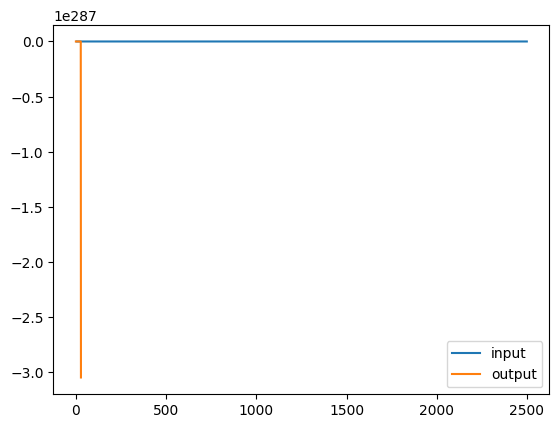

In [26]:
plt.plot(input_history, label='input')
plt.plot(output_history, label='output')
plt.legend()

In [27]:
h = [0.0,
0.0,
0.1403911377561489,
0.1405669217592211,
0.14056714185869623,
0.14056714213428323,
0.14056714213462831,
0.14056714213462873,
0.14056714213462873,
0.14056714213462873,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
0.1405671421346287,
]

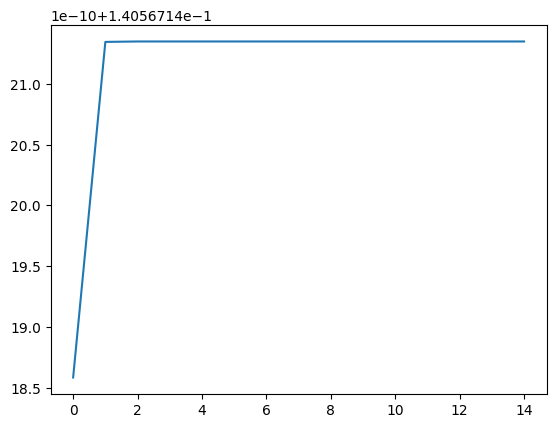

In [28]:
plt.plot(h[4:])

In [29]:
motors[2].open_loop()

TransferFunction(array([75.]), array([0.18, 4.68, 4.5 ]))

In [30]:
motors[2].closed_loop()

TransferFunction(array([ 13.5, 351. , 337.5]), array([3.240000e-02, 1.684800e+00, 1.180224e+02, 2.499120e+03,
       2.382750e+03]))

In [31]:
print(motors[2].closed_loop())


            13.5 s^2 + 351 s + 337.5
------------------------------------------------
0.0324 s^4 + 1.685 s^3 + 118 s^2 + 2499 s + 2383

